In [1]:
import pandas as pd
import glob
os.chdir("../CSV")
import re
import matplotlib.pyplot as plt

In [2]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [3]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [4]:
df = pd.read_csv("combined_csv.csv")

In [5]:
df['Brand'].value_counts()

BOSS               860
Brooks Brothers    350
Fred Perry          58
Name: Brand, dtype: int64

In [6]:
df = df.replace('\n','', regex=True)
df.loc[df.Gender == "Female", "Gender"] = "Womens"
df.loc[df.Gender == "Male", "Gender"] = "Mens"
df.loc[df.Category == "Men's T-Shirts", "Category"] = "T-Shirts"
df.loc[df.Category == "Polo Shirts", "Category"] = "Polos"
df.loc[df.Category == "Dresses", "Gender"] = "Womens"
df.loc[df.Category == "Men's Suits", "Category"] = "Suits"
df.loc[df.Category == "Men's Knitwear", "Gender"] = "Mens"
df.loc[df.Category == "Men's Knitwear", "Category"] = "Jumpers"
df.loc[df.Category == "Pants", "Category"] = "Trousers"
df.loc[df.Category == "Tops", "Gender"] = "Womens"
df.loc[df.Category == "Blouses", "Gender"] = "Womens"
df.loc[df.Category == "Skirts", "Gender"] = "Womens"
df.loc[df.Category == "T-Shirts", "Gender"] = "Mens"
df.loc[df.Category == "Shorts", "Gender"] = "Mens"
df.loc[(df['Brand']=='BOSS') & (df['Category']=='Trousers'),'Gender'] = 'Mens'

df['Price'] = df['Price'].fillna(0)

In [7]:
df.isnull().sum()

ID           0
Brand        0
Category     0
Gender       0
Name         0
Image URL    0
Price        0
dtype: int64

In [8]:
df['Gender'].value_counts()

Mens      696
Womens    339
Men       162
Women      71
Name: Gender, dtype: int64

In [9]:
df

,ID,Brand,Category,Gender,Name,Image URL,Price
0,0.0,Brooks Brothers,Trousers,Men,Clark Fit Seersucker Pants,https://brooksbrothers.scene7.com/is/image/Bro...,0
1,1.0,Brooks Brothers,Trousers,Men,Clark Fit Linen and Cotton Chino Pants,https://brooksbrothers.scene7.com/is/image/Bro...,0
2,2.0,Brooks Brothers,Trousers,Men,Clark Fit Stripe Seersucker Pants,https://brooksbrothers.scene7.com/is/image/Bro...,0
3,3.0,Brooks Brothers,Trousers,Men,Clark Fit Stretch Advantage Chino® Pants,https://brooksbrothers.scene7.com/is/image/Bro...,0
4,4.0,Brooks Brothers,Trousers,Men,Clark Fit Supima® Cotton Stretch Chinos,https://brooksbrothers.scene7.com/is/image/Bro...,0
...,...,...,...,...,...,...,...
1263,23.0,BOSS,Tops,Womens,Button-shoulder scoop-neck top with zebra-insp...,https://images.hugoboss.com/is/image/boss/hbeu...,"HK$ 1,900.00Price"
1264,24.0,BOSS,Tops,Womens,Swarovski®-embellished sleeveless top in crepe...,https://images.hugoboss.com/is/image/boss/hbeu...,"HK$ 2,800.00Price"
1265,25.0,BOSS,Tops,Womens,Striped scoop-neck top in stretch jersey,https://images.hugoboss.com/is/image/boss/hbeu...,"HK$ 1,000.00Price"
1266,26.0,BOSS,Tops,Womens,Slim-fit ribbed top in stretch yarn,https://images.hugoboss.com/is/image/boss/hbeu...,"HK$ 1,550.00Price"


<AxesSubplot:>

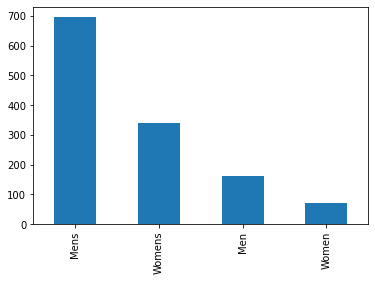

In [10]:
df['Gender'].value_counts().plot(kind='bar')

<AxesSubplot:>

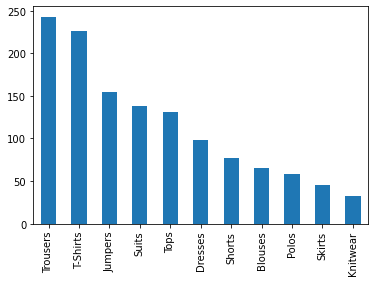

In [11]:
df['Category'].value_counts().plot(kind='bar')

In [12]:
df['Category'].value_counts()

Trousers    243
T-Shirts    226
Jumpers     155
Suits       138
Tops        131
Dresses      98
Shorts       77
Blouses      65
Polos        58
Skirts       45
Knitwear     32
Name: Category, dtype: int64

In [13]:
df.to_csv("CombinedCleaned.csv")